# Aggregate Functions

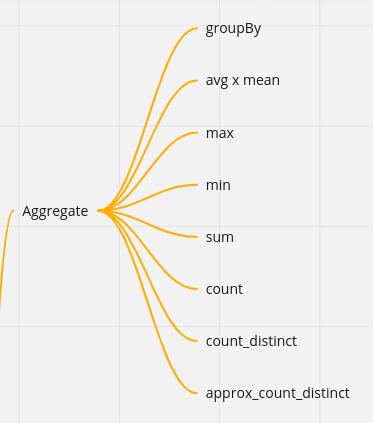

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql import functions as F
from pyspark.sql import Window

# Create SparkSession
spark = (SparkSession.builder
                    .appName('PySparkSyntax')
                    .getOrCreate()
        )

# Define the schema for a DataFrame
schema = StructType([
    StructField("name", StringType(), True),
    StructField("age", IntegerType(), True),
    StructField("city", StringType(), True)
])


# Create a DataFrame using the schema
data = [("Alice", 25, "New York")
        , ("Alice", 25, "New York")
        , ("Bob", 30, "San Francisco")
        , ("Bob", 12, "Las Vegas")
        , ("Charlie", 35, "Bob")
        , ("Charlie", 12, "New York")
        , ("Charlie", None, "Chicago")
        , (None, None, "Chicago")
        , (None, None, None)]
df = spark.createDataFrame(data, schema)

df.show()

## [groupBy](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.DataFrame.groupBy.html)

DataFrame.groupBy(*cols: ColumnOrName) → GroupedData

Groups the DataFrame using the specified columns, so we can run aggregation on them. See GroupedData for all the available aggregate functions.

## [avg](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.avg.html)

pyspark.sql.functions.avg(col: ColumnOrName) → pyspark.sql.column.Column

Aggregate function: returns the average of the values in a group.

In [ ]:
df_agg = df.groupBy('name').avg('age')

df_agg.show()

In [ ]:
df_agg = df.groupBy('name').agg(F.avg('age').alias('media'))

df_agg.show()

## [mean](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.mean.html)

pyspark.sql.functions.mean(col: ColumnOrName) → pyspark.sql.column.Column

Aggregate function: returns the average of the values in a group.

In [ ]:
df_agg = df.groupBy('name').agg(F.mean('age').alias('media'))

df_agg.show()

## [min](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.min.html)

pyspark.sql.functions.min(col: ColumnOrName) → pyspark.sql.column.Column

Aggregate function: returns the minimum value of the expression in a group.

In [ ]:
df_agg = df.groupBy('name').agg(F.min('age').alias('min'))

df_agg.show()

## [max](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.max.html)

pyspark.sql.functions.max(col: ColumnOrName) → pyspark.sql.column.Column

Aggregate function: returns the maximum value of the expression in a group.

In [ ]:
df_agg = df.groupBy('name').agg(F.max('age').alias('max'))

df_agg.show()

## [sum](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.sum.html)

pyspark.sql.functions.sum(col: ColumnOrName) → pyspark.sql.column.Column

Aggregate function: returns the sum of all values in the expression.

In [ ]:
df_agg = df.groupBy('name').agg(F.sum('age').alias('sum'))

df_agg.show()

## [count](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.count.html)

pyspark.sql.functions.count

Aggregate function: returns the number of items in a group.

In [ ]:
df_agg = df.groupBy('name').agg(F.count('age').alias('count')).orderBy(F.desc('count'))

df_agg.show()

## [count_distinct](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.count_distinct.html)

pyspark.sql.functions.count_distinct(col: ColumnOrName, *cols: ColumnOrName) → pyspark.sql.column.Column

Returns a new Column for distinct count of col or cols.

In [ ]:
df_agg = df.groupBy('name').agg(F.count_distinct('age').alias('count_distinct')).orderBy(F.desc('count_distinct'))

df_agg.show()

# [approx_count_distinct](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.approx_count_distinct.html)

pyspark.sql.functions.approx_count_distinct(col: ColumnOrName, rsd: Optional[float] = None) → pyspark.sql.column.Column

Aggregate function: returns a new Column for approximate distinct count of column col.

Parameters:

col: Column or str

rsd: float, optional

maximum relative standard deviation allowed (default = 0.05). For rsd < 0.01, it is more efficient to use count_distinct()

In [ ]:
df_agg = df.groupBy('name').agg(F.approx_count_distinct('age', 0.2).alias('approx_count_distinct')).orderBy(F.desc('approx_count_distinct'))

df_agg.show()

In [ ]:
df_agg = df.groupBy('name').agg(F.approx_count_distinct('age', 0.01).alias('approx_count_distinct')).orderBy(F.desc('approx_count_distinct'))

df_agg.show()